# Algerian Forest Fires DataSet

# Problem Statement

In [ ]:
# The problem we aim to solve here is predicting the Fire Weather Index (FWI) for the Bejaia and Sidi Bel-abbes regions in Algeria. 
# The FWI is an important measure of fire danger, which indicates the likelihood of forest fires based on weather conditions.
# we want to build a mathematical model that can understand how different weather factors (like temperature, humidity, wind speed, and rain) 
# and FWI components (FFMC, DMC, DC, ISI, BUI) influence the FWI.

# 1. Exploratory Data Analysis (EDA)
# 2. DATA CLEANING
# 3. DATA VISUALIZATIONS
# 4. DATA PREPROCESSING

# Importing Reaquired Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Read the dataset

df = pd.read_csv("Algerian_forest_fires_dataset.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# 1. Exploratory Data Analysis (EDA)

In [81]:
# show the only first 5 rows 

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [82]:
# show the only last 5 rows 

df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [101]:
# df.shape

# (247,14)

# Data Cleaning

# Checking Null Vlaues

In [84]:
# check null values in the features

df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [14]:
# Check Missing Values
# checking if there any null value in any column

df[df.isnull().any(axis =1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
# As we know we have two regions in our dataset "Bejaia region" and "Sidi Bel-abbes region"
# Now,Lets create seperate column named "Region" Column.
# in the First region we will assign 0 i.e, "Bejaia region"
# And in the Second Region We Will assign 1 i.e, "Sidi Bel-abbes region"

In [15]:
# Region 1 = Bejaia Region
df.loc[:122,'Region']=0

#Region 2 = Sidi-Bel Abbes Region
df.loc[122:,'Region']=1

df[['Region']] = df[['Region']].astype(int)

In [16]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [17]:
# Remove null value

df=df.dropna().reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [21]:
df[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
124,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [85]:
# Remove the 122nd row

df=df.drop(122).reset_index(drop=True)

In [86]:
## fix spaces in columns names

df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

# 2. Data Visualizations

In [94]:
# drop month,day and year

#df.drop(['day','month','year'],axis=1,inplace=True)

In [98]:
# encoding of the categories in classes

# df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [93]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
245,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [96]:
df['Classes'].value_counts()

Classes
1    138
0    108
Name: count, dtype: int64

In [26]:
# Show the Information such as Non-null Vlaues,Count and Dtypes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1   RH           243 non-null    object
 2   Ws           243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    object
 11  Region       243 non-null    int32 
dtypes: int32(1), object(11)
memory usage: 22.0+ KB


In [28]:
# Changing the columns to Float data type
df[['Temperature','RH','Ws','Rain','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Temperature','RH','Ws','Rain','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int32  
dtypes: float64(10), int32(1), object(1)
memory usage: 22.0+ KB


# Histogram

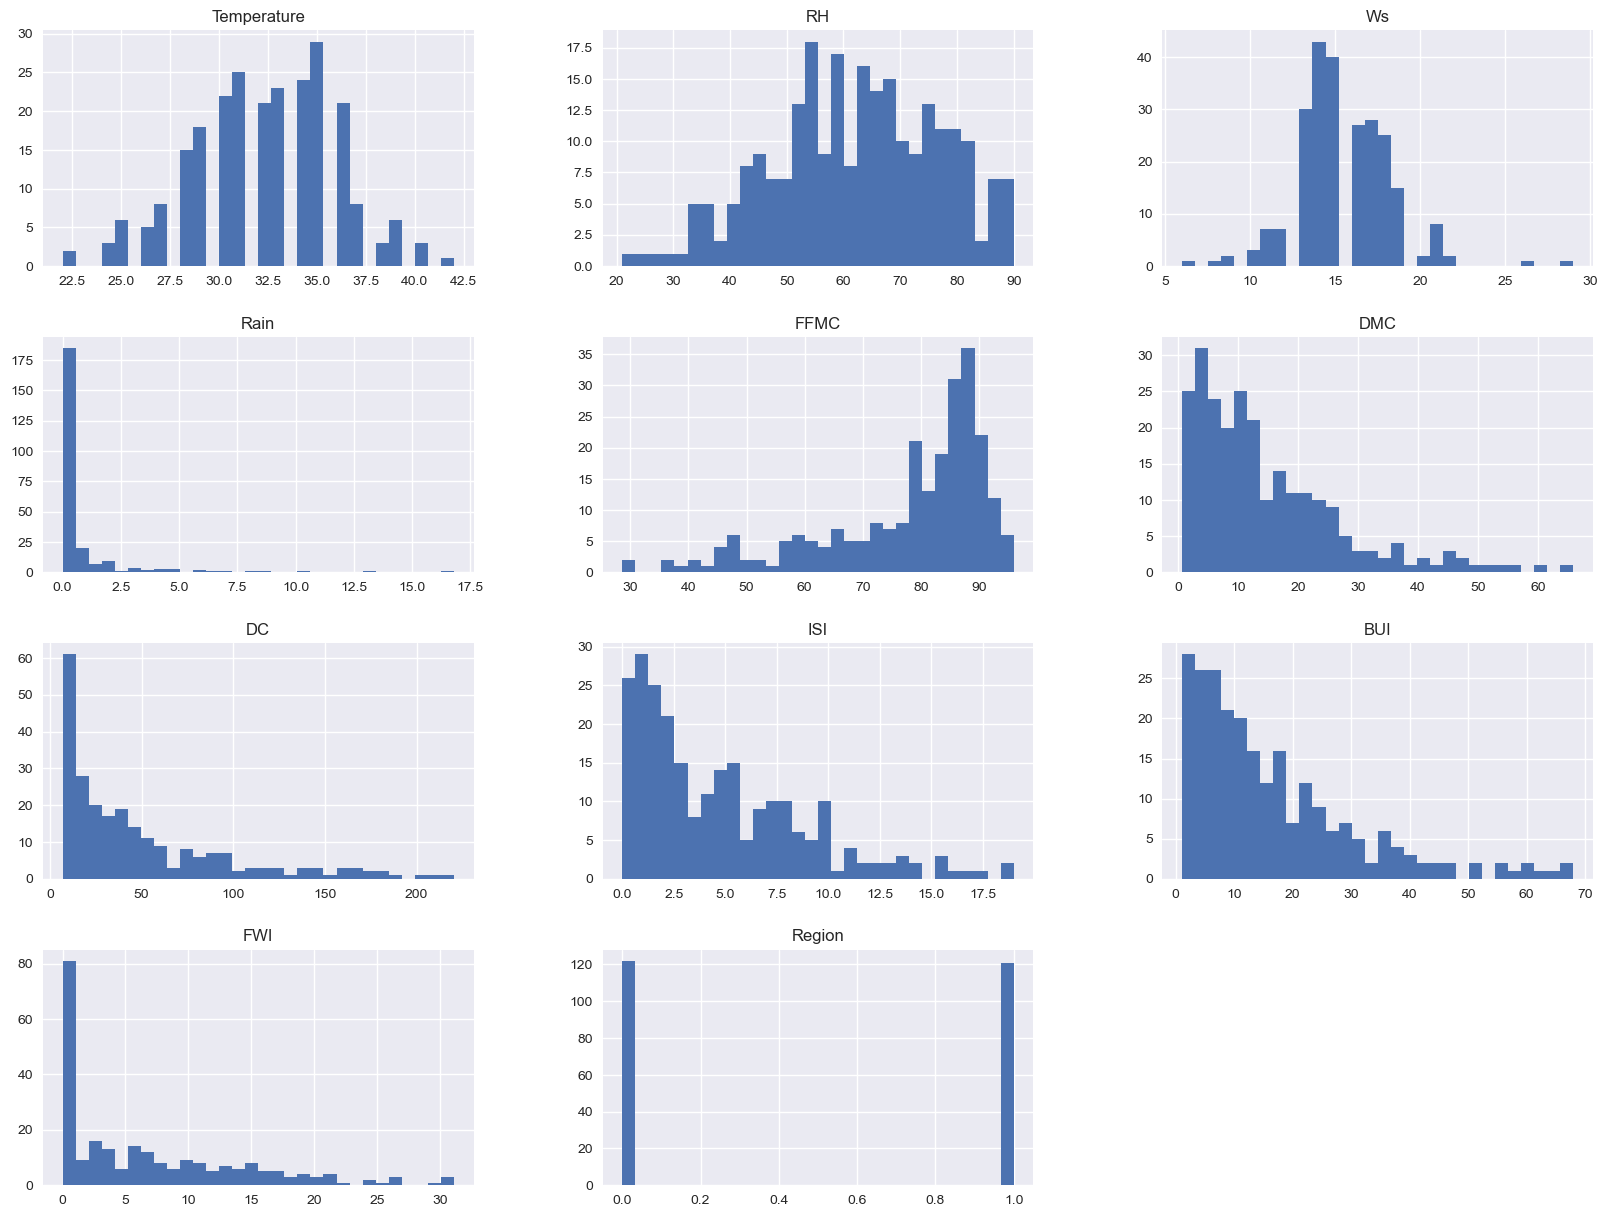

In [36]:
#sns.set_style('seaborn')

plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))
plt.show()

# Pie Chart

In [55]:
percentage = df['Classes'].value_counts(normalize=True)*100

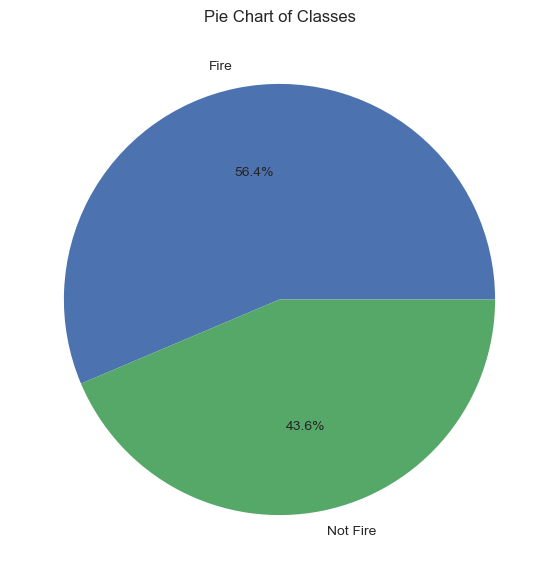

In [54]:
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels = classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")

plt.show()

In [62]:
# calculates the correlation between all numerical columns in the DataFrame

df.corr().round(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.49,0.38,0.60,0.46,0.57,0.52,0.27
RH,-0.65,1.00,0.24,0.22,-0.64,-0.41,-0.23,-0.69,-0.35,-0.58,-0.43,-0.40
Ws,-0.28,0.24,1.00,0.17,-0.17,-0.00,0.08,0.01,0.03,0.03,-0.07,-0.18
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38,-0.04
FFMC,0.68,-0.64,-0.17,-0.54,1.00,0.60,0.51,0.74,0.59,0.69,0.77,0.22
DMC,0.49,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.68,0.98,0.88,0.59,0.19
DC,0.38,-0.23,0.08,-0.30,0.51,0.88,1.00,0.51,0.94,0.74,0.51,-0.08
ISI,0.60,-0.69,0.01,-0.35,0.74,0.68,0.51,1.00,0.64,0.92,0.74,0.26
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.59,0.09
FWI,0.57,-0.58,0.03,-0.32,0.69,0.88,0.74,0.92,0.86,1.00,0.72,0.20


<Axes: >

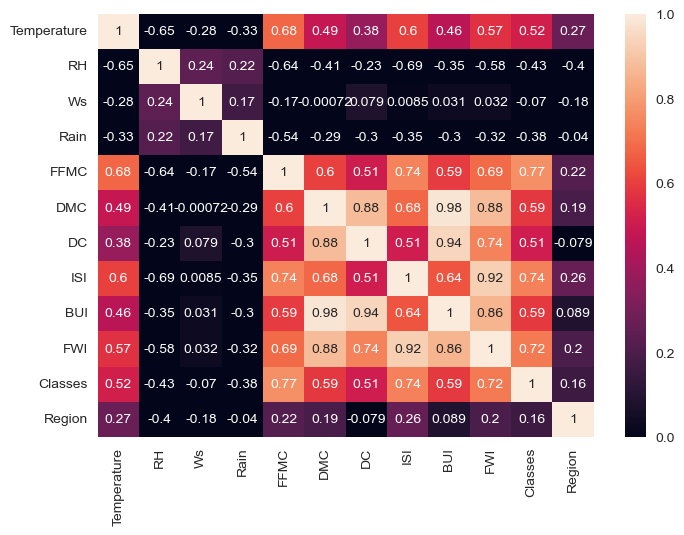

In [64]:
sns.heatmap(df.corr(),annot = True, vmin=0, vmax = 1)

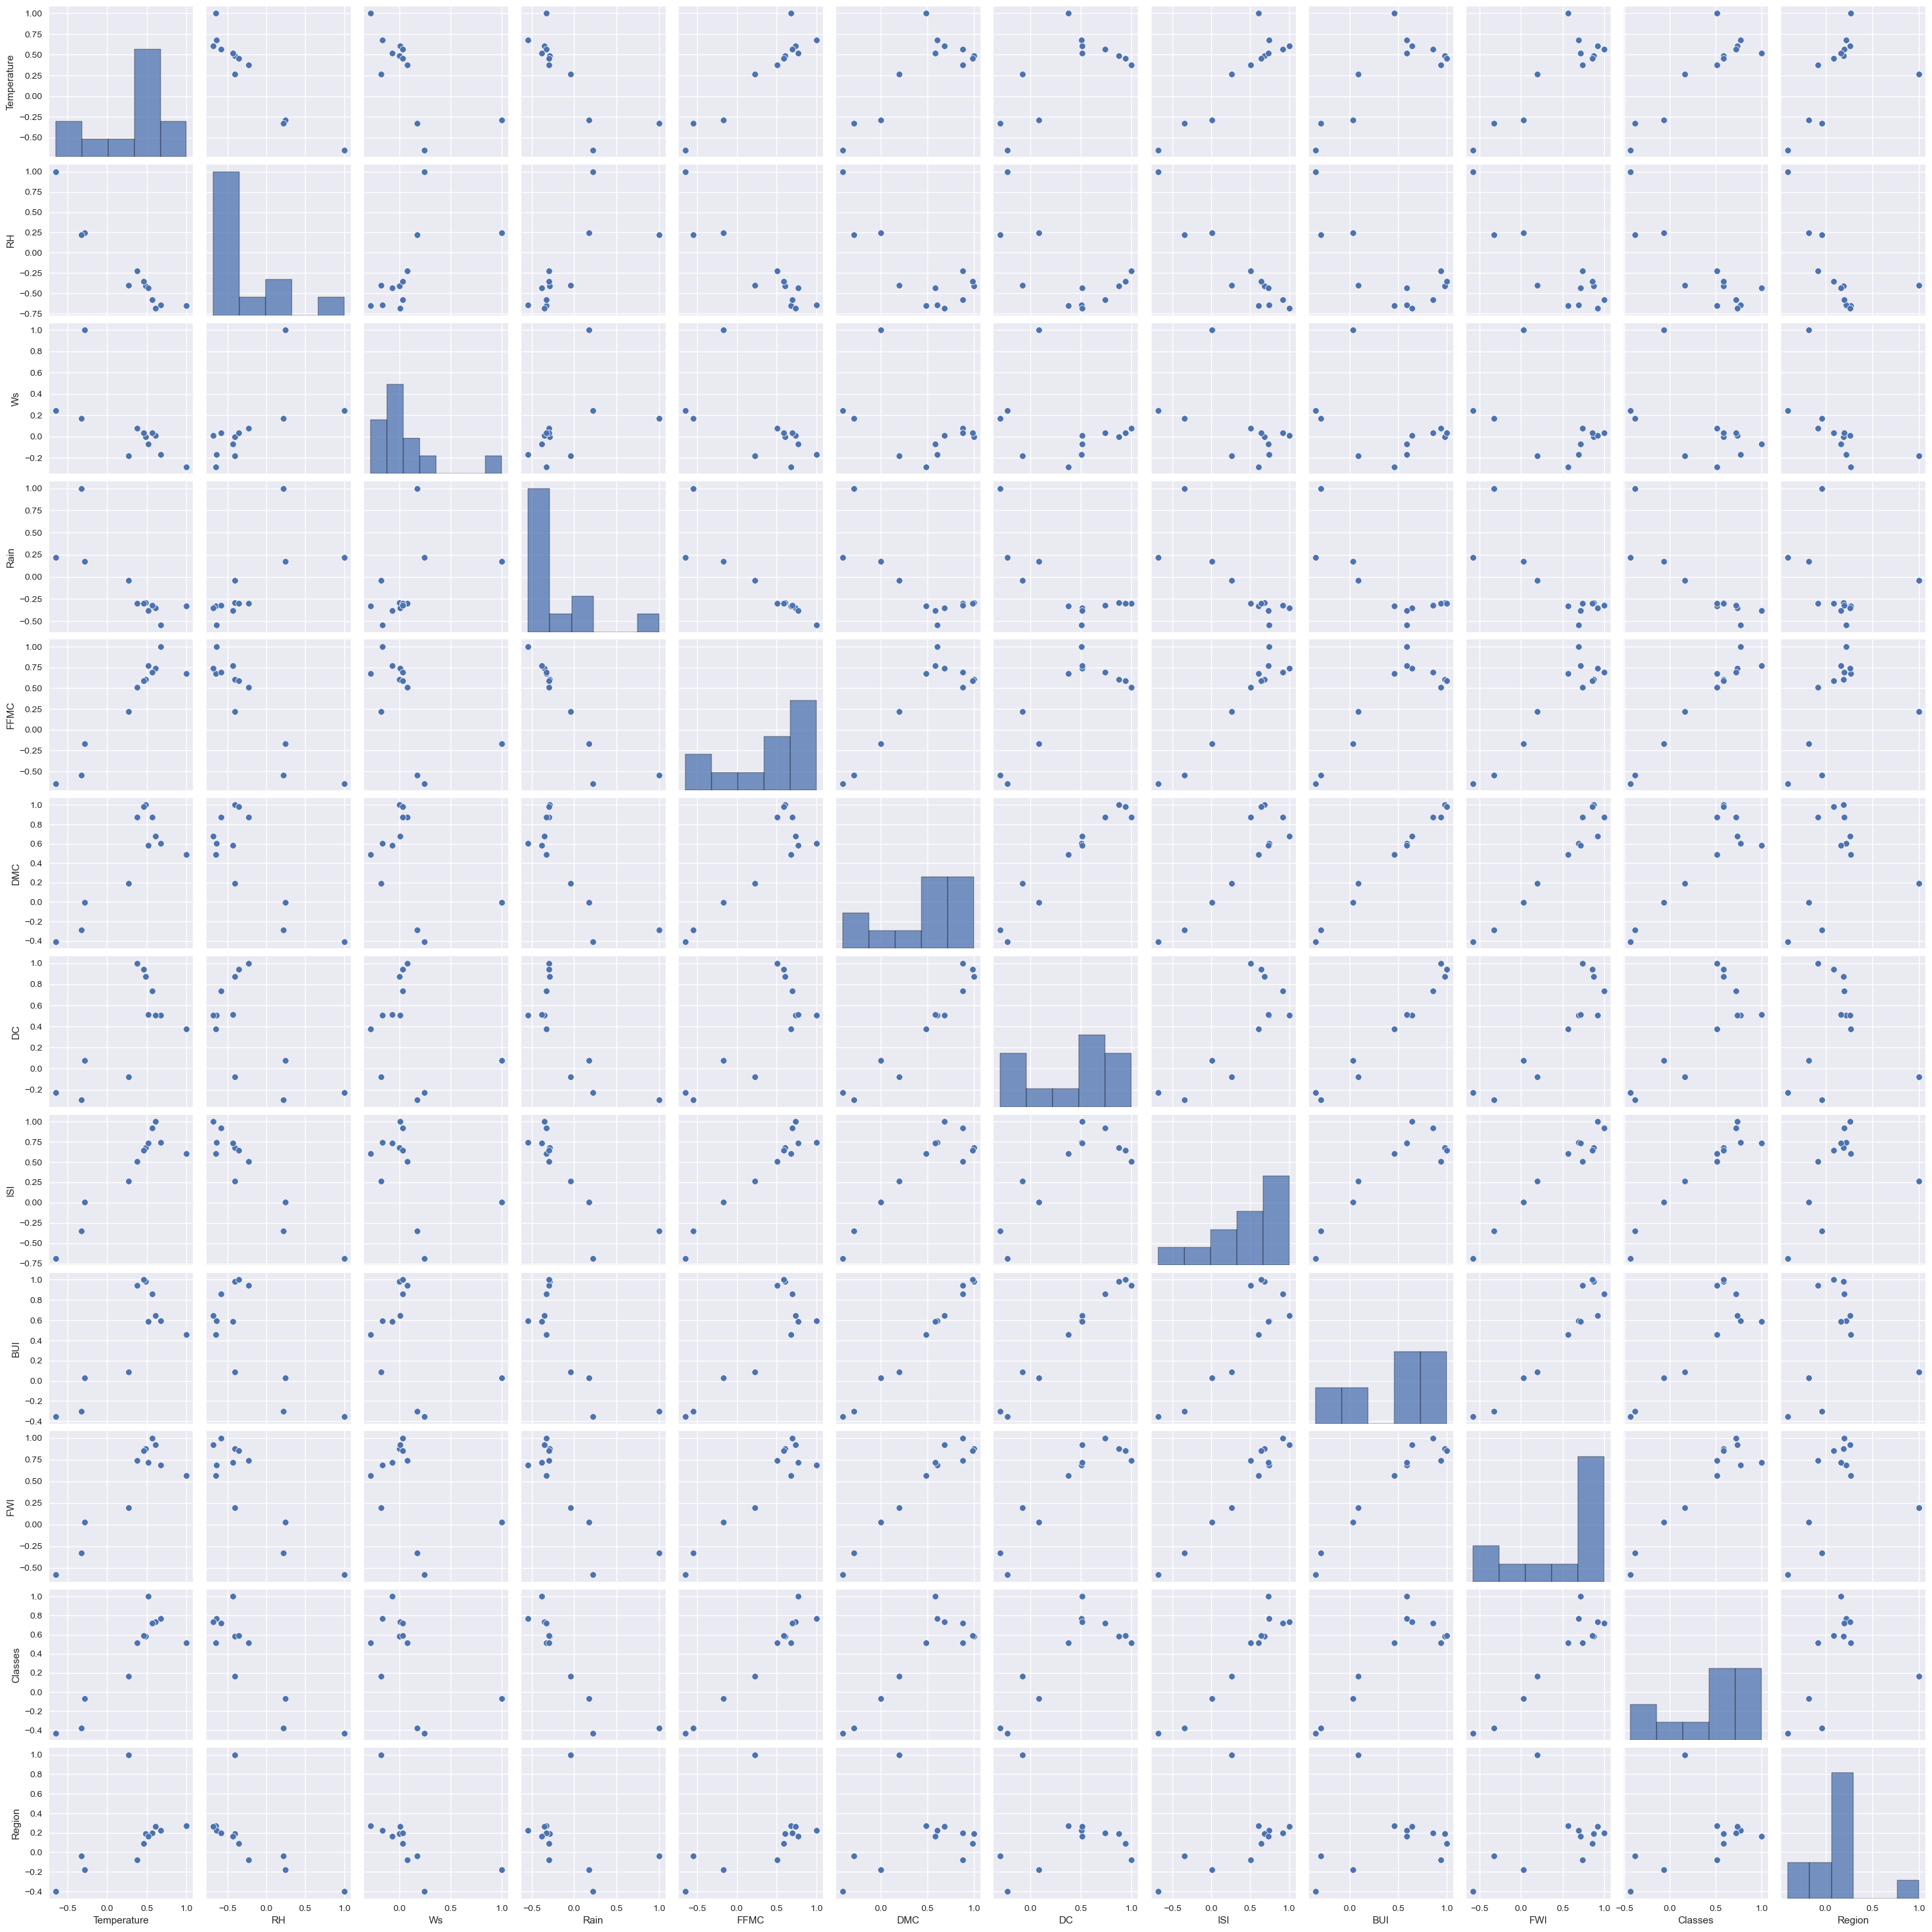

In [57]:
# Pairplot

sns.pairplot(df.corr())

<Axes: >

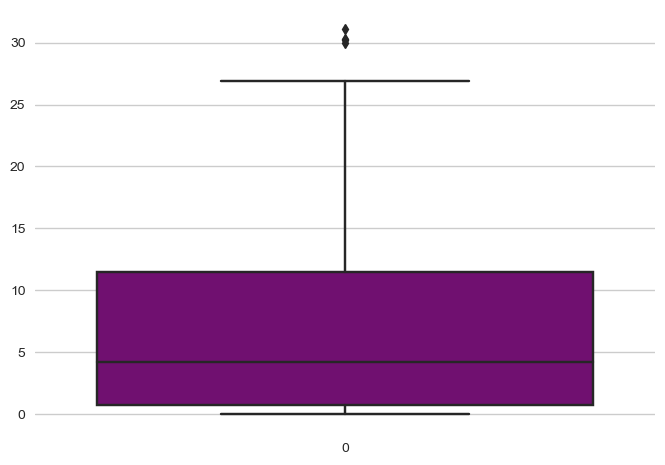

In [66]:
# Box Plots

sns.boxplot(df['FWI'],color='Purple')

# Data Preprocessing

In [118]:
# Seperate out Independent And dependent features

x = df[['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes']]
y = df[['Temperature']]

In [119]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
241,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
242,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
243,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [120]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
241,30
242,28
243,27
244,24


In [68]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [69]:
# Train Data is 182
# Test Data is 61

X_train.shape,X_test.shape

((182, 11), (61, 11))

# Scaling a features

In [121]:
### creating a StandardScalar object

scaler=StandardScaler()
scaler

StandardScaler()

In [122]:
### Using fit_transform to standardise Train data

X_train=scaler.fit_transform(X_train)

In [123]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)

X_test=scaler.transform(X_test)

# LINEAR REGRESSION MODEL

In [124]:
## creating linear regression model

linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [125]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [126]:
### Passing training data(X and y) to the model

linear_reg.fit(X_train, y_train)

LinearRegression()

In [127]:
### Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [-6.08742794e-02 -1.76019852e-01 -6.93227982e-02  5.87019808e-04
 -8.83497419e-01  3.18981916e-03 -6.48363381e-01  5.04033269e+00
  4.27031281e+00  3.01209673e-01 -1.69104994e-01]
2. Intercept of best fit hyper plane is 7.156043956043958


# Prediction of test data

In [128]:
linear_reg_pred=linear_reg.predict(X_test)

In [129]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

# Validation of Linear Regression assumptions

Text(0, 0.5, 'Predicted data')

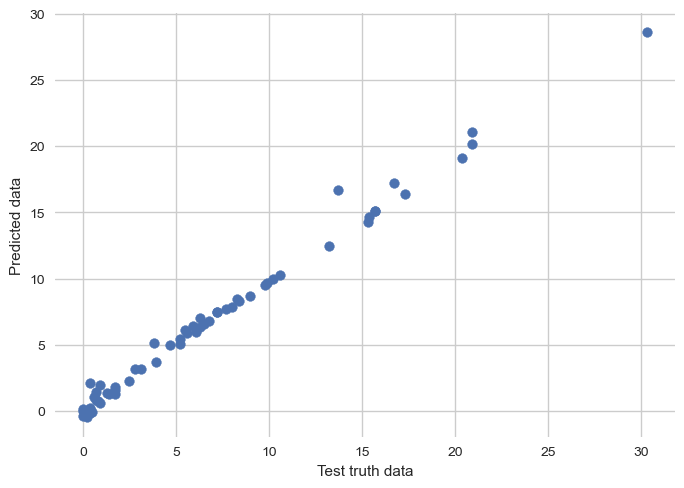

In [130]:
# 1. Linear Relationship

plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

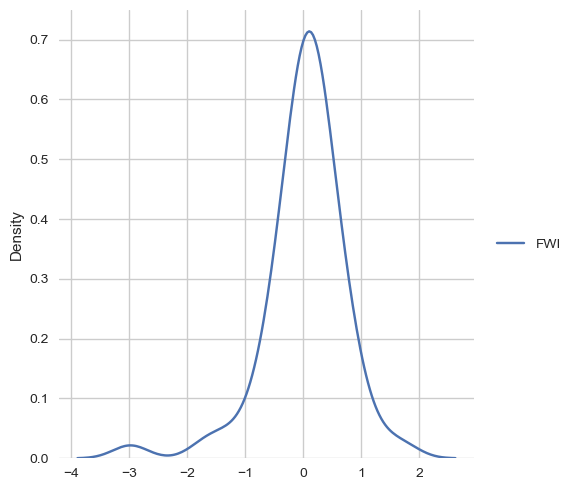

In [131]:
# 2. Residual should be normally distributed

sns.displot(data=residual_linear_reg, kind='kde')

Text(0, 0.5, 'Residuals')

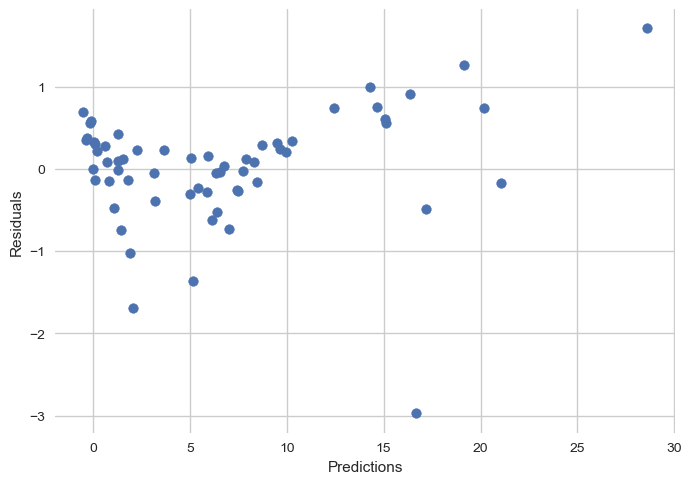

In [132]:
# 3. Residual and Predicted values should follow uniform distribution

plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# Cost Function Values

In [133]:
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 0.47
MAE :0.47
RMSE : 0.69


# Performance Metrics

In [134]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjusted␣R-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 98.939 % 
Adjusted␣R-Squared Accuracy : 98.7%


# Ridge Regresion Model

In [135]:
## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [136]:
### Passing training data(X and y) to the model

ridge_reg.fit(X_train, y_train)

Ridge()

In [137]:
### Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [-0.06436724 -0.22021628 -0.05253549  0.01397091 -0.82682079  1.66901314
  0.2279912   4.90955241  1.81097518  0.34376949 -0.18215853]
2. Intercept of best fit hyper plane is 7.156043956043957


# prediction of test data

In [138]:
ridge_reg_pred=ridge_reg.predict(X_test)

In [139]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

# Validation of Ridge Regression assumptions

Text(0, 0.5, 'Predicted data')

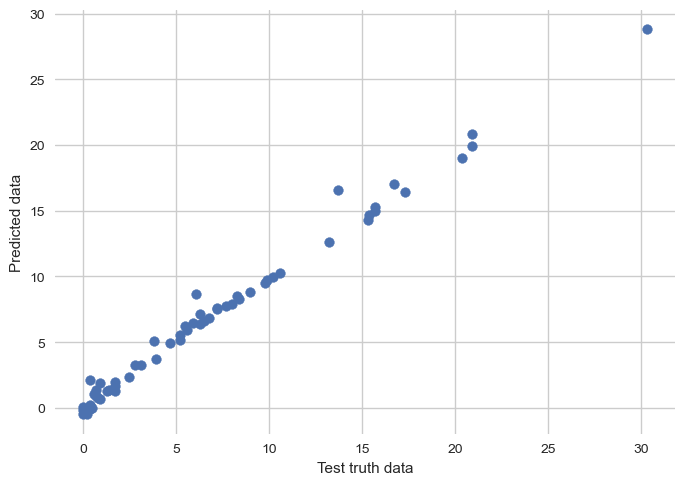

In [141]:
# 1. Linear Relationship

plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

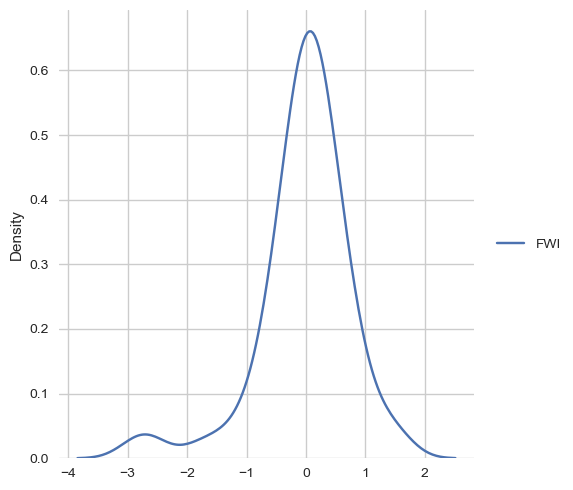

In [142]:
# 2. Residual should be normally distributed

sns.displot(data = residual_ridge_reg, kind='kde')

Text(0, 0.5, 'Residuals')

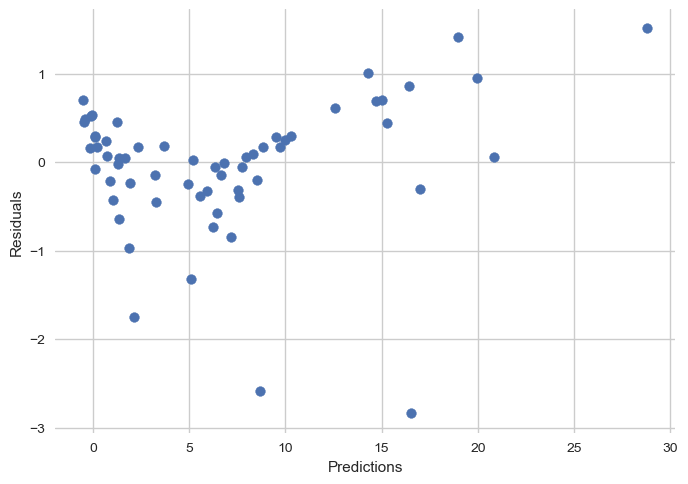

In [143]:
# 3. Residual and Predicted values should follow uniform distribution

plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# Cost Function Values

In [146]:
print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")

MSE : 0.57
MAE :0.5
RMSE : 0.75


# Performance Metrics

In [147]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted␣R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 98.717 % 
Adjusted␣R-Squared Accuracy : 98.43%


# Lasso Regression Model

In [148]:
## creating Lasso regression model

lasso_reg=Lasso()
lasso_reg

Lasso()

In [149]:
### Passing training data(X and y) to the model

lasso_reg.fit(X_train, y_train)

Lasso()

In [150]:
### Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [ 0.         -0.          0.         -0.          0.          1.45286638
  0.          4.09444138  1.50379367  0.          0.        ]
2. Intercept of best fit hyper plane is 7.156043956043957


# Prediction of test data

In [151]:
lasso_reg_pred=lasso_reg.predict(X_test)

In [152]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

# Validation of Lasso Regression assumptions

Text(0, 0.5, 'Predicted data')

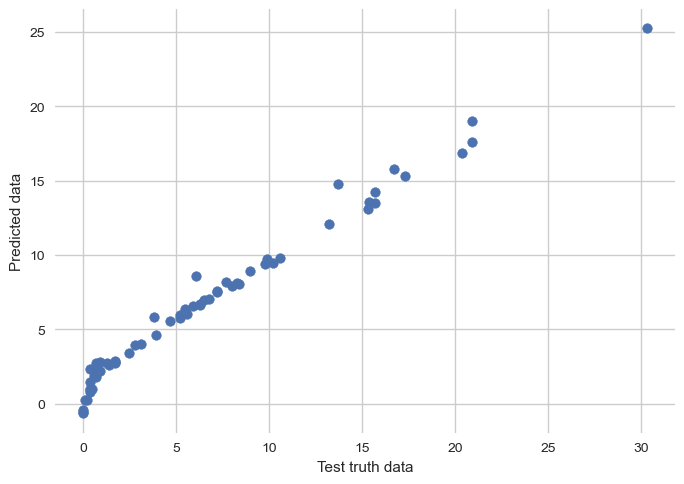

In [153]:
# 1. Linear Relationship

plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

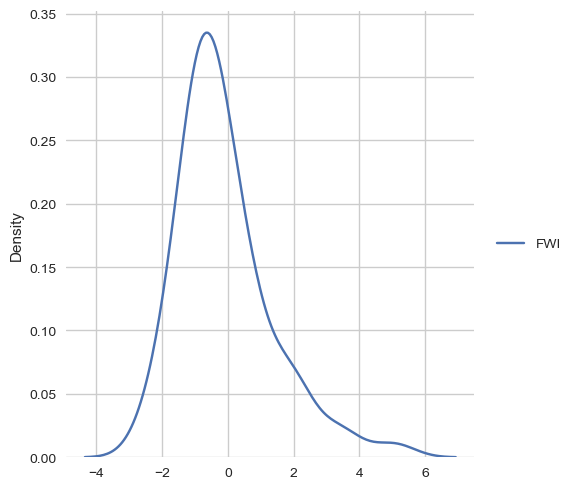

In [154]:
# 2. Residual should be normally distributed

sns.displot( data = residual_lasso_reg, kind='kde')

Text(0, 0.5, 'Residuals')

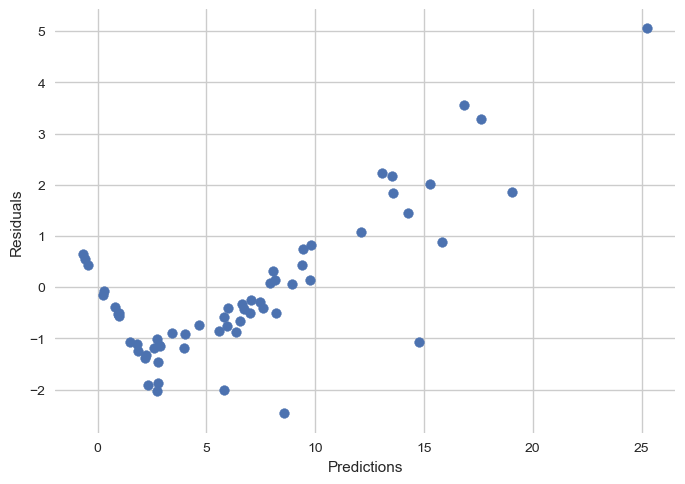

In [156]:
# 3. Residual and Predicted values should follow uniform distribution

plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# Cost Function Values

In [157]:
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")

MSE : 2.0
MAE :1.08
RMSE : 1.41


# Performance Metrics

In [158]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjusted␣R-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 95.481 % 
Adjusted␣R-Squared Accuracy : 94.47%


# Elastic Net Regression Model

In [159]:
## creating Elastic-Net regression model

elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [160]:
### Passing training data(X and y) to the model

elastic_reg.fit(X_train, y_train)

ElasticNet()

In [161]:
### Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [ 0.14207848 -0.57130272  0.         -0.          0.20932534  1.38079086
  0.69728285  2.20650598  1.20778159  0.68601813  0.        ]
2. Intercept of best fit hyper plane is 7.156043956043956


# Prediction of test data

In [162]:
elastic_reg_pred=elastic_reg.predict(X_test)

In [163]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg = pd.DataFrame(residual_elastic_reg)

# Validation of Elastic Regression assumptions

Text(0, 0.5, 'Predicted data')

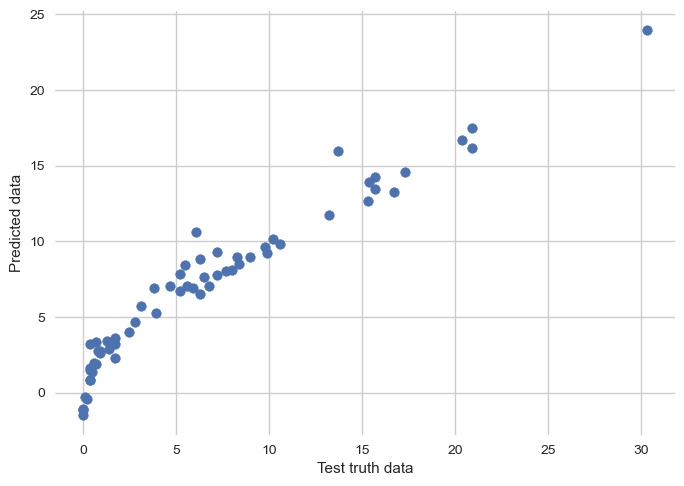

In [165]:
# 1. Linear Relationship

plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

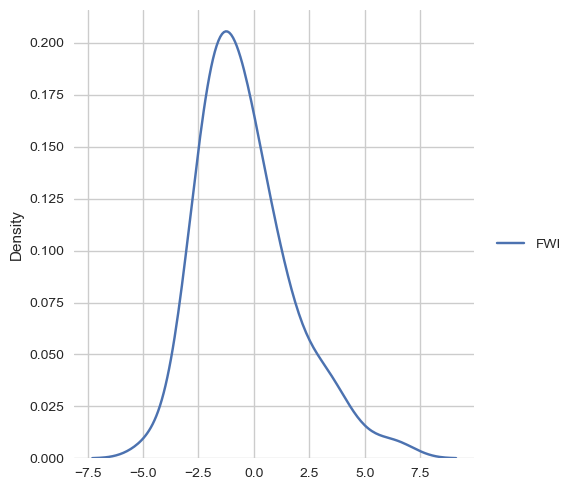

In [166]:
# 2. Residual should be normally distributed

sns.displot( data = residual_elastic_reg, kind='kde')

Text(0, 0.5, 'Residuals')

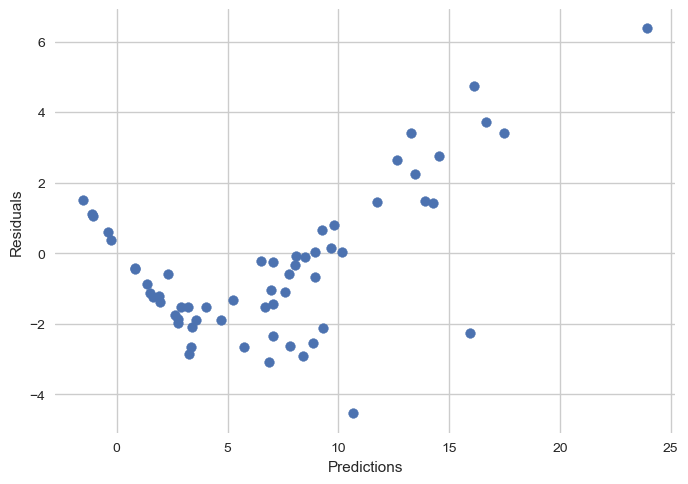

In [167]:
# 3. Residual and Predicted values should follow uniform distribution

plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# Cost Function Values

In [168]:
print(f"MSE : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, elastic_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")

MSE : 4.4
MAE :1.68
RMSE : 2.1


# Performance Metrics

In [170]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)} % \nAdjusted␣R-Squared Accuracy : {round(elastic_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 90.067 % 
Adjusted␣R-Squared Accuracy : 87.84%


# Comparisions of all Models

# Cost Function Values

In [172]:
print(f"--------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :
{round(mean_squared_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :
{round(mean_squared_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net
Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}")
print(f"---------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,
linear_reg_pred),2)}\n2. Ridge Regression :
{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :
{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net
Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}")
print(f"--------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,
linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.
sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n3. Lasso Regression :
{round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n4. Elastic
Net Regression : {round(np.sqrt(mean_squared_error(y_test,
elastic_reg_pred)),2)}")
print(f"--------------------------------------")

SyntaxError: unterminated string literal (detected at line 2) (1938976053.py, line 2)

In [173]:
print(f"--------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :{round(mean_squared_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :{round(mean_squared_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net␣Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}")
print(f"---------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net␣Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}")
print(f"--------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n3. Lasso Regression :{round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n4. Elastic␣Net Regression : {round(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)),2)}")
print(f"--------------------------------------")

--------------------------------------
MSE:
1. Linear Regression : 0.47
2. Ridge Regression :0.57
3. Lasso Regression :2.0
4. Elastic Net␣Regression : 4.4
---------------------------------------
MAE:
1. Linear Regression : 0.47
2. Ridge Regression :0.5
3. Lasso Regression :1.08
4. Elastic Net␣Regression : 1.68
--------------------------------------
RMSE:
1. Linear Regression : 0.69
2. Ridge Regression : 0.75
3. Lasso Regression :1.41
4. Elastic␣Net Regression : 2.1
--------------------------------------


# Performance Metrics

In [174]:
print(f"--------------------------------------")
print(f"R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_r2_score*100,3)} %\n4. Elastic Net Regression :{round(elastic_reg_r2_score*100,3)} %")
print(f"--------------------------------------")
print(f"Adjusted R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_adj_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_adj_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_adj_r2_score*100,3)} %\n4. Elastic Net Regression :{round(elastic_reg_adj_r2_score*100,3)} %")
print(f"--------------------------------------")

--------------------------------------
R-Squared Accuracy:
1. Linear Regression :98.939 %
2. Ridge Regression :98.717 %
3. Lasso Regression :95.481 %
4. Elastic Net Regression :90.067 %
--------------------------------------
Adjusted R-Squared Accuracy:
1. Linear Regression :98.7 %
2. Ridge Regression :98.429 %
3. Lasso Regression :94.467 %
4. Elastic Net Regression :87.837 %
--------------------------------------


# Conslusion

In [175]:
#  If you use the date feature without categorizing then our accuracy will be around 50 % and
# after the inclusion of categorization it has increased to 66 %, though it is not so good.

 # we can remove skewness from the data and also can use some method to handle imbalanced
# data in Rain feature. This is just a basic model. I will add all the possible techniques to
# improve accuracy in next session